In [186]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry
import matplotlib.dates as mdates

## Number of Repositories With GAP Files Created in Each Year
##### NB: The data considers repositories with atleast one GAP file

In [187]:
# Read data
repository_df = pd.read_csv("../data/repository_details.csv")

In [188]:
# Extract year from dates
repository_df["Created Date"] = pd.to_datetime(repository_df["Created Date"])
repository_df["Year"] = repository_df["Created Date"].dt.year

# Group by Year and Count
repositories_per_year = repository_df.groupby("Year").size()

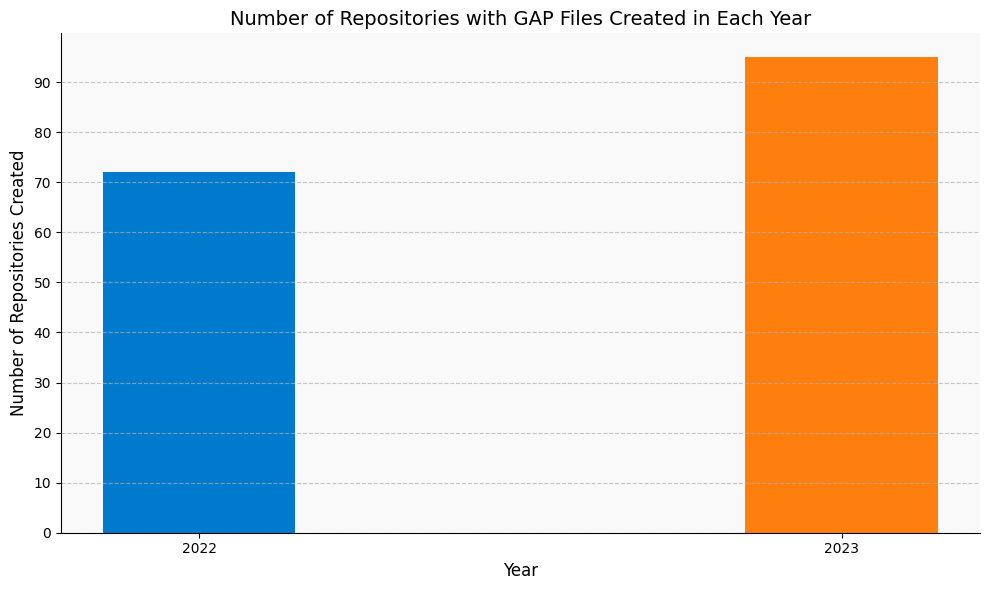

In [202]:
# Visualize the data 
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Custom color scheme for bars
# Acknowledgment: The following colour codes are used from https://www.colorhexa.com/.
bar_colors = ['#007ACC', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

# Custom bar width and gap
bar_width = 0.3
bar_gap = 0.2

# Plot the bar chart
plt.bar(repositories_per_year.index, repositories_per_year.values, width=bar_width, color=bar_colors)

# Styling the chart
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Repositories Created", fontsize=12)
plt.title("Number of Repositories with GAP Files Created in Each Year", fontsize=14)

data_max = int(repositories_per_year.values.max())

# Set interval as 10% of the data range
y_ticks_interval = round(data_max * 0.1)

# Custom font for tick labels
plt.xticks(repositories_per_year.index, fontsize=10)
plt.yticks(range(0, data_max + 1, y_ticks_interval))
# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize the background color
# Acknowledgment: The following colour code is used from https://www.colorhexa.com/.
plt.gca().set_facecolor('#F9F9F9')

plt.tight_layout()  # Adjust spacing to prevent label overlap

# Save the plot as a PNG image
output_path = '../output/repository_per_year.png'  
plt.savefig(output_path,  dpi=400, bbox_inches='tight') 

plt.show()

## Distribution of Users Contributed to Repositories with GAP Files
##### NB: The data considers repositories with atleast one GAP file

In [190]:
# Read data from CSV
file_path = "../data/user_location.csv"  # Replace with the actual file path
user_location_df = pd.read_csv(file_path)

# Group by country and calculate the count of users from each country
country_counts = user_location_df['Country'].value_counts()

# Create a DataFrame with country names and their corresponding counts
df_countries = pd.DataFrame({'Country': country_counts.index, 'User Count': country_counts.values})

# Load world shapefile data using geopandas
# Acknowledgment: The world shapefile data is used from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
world = gpd.read_file('../resources/ne_110m_admin_0_countries.shp')  

# Merge the world shapefile data with the user count data
merged_data = world.merge(df_countries, left_on='ADMIN', right_on='Country', how='left')

# Find the smallest positive value in the 'User Count' column
min_positive_value = merged_data['User Count'].min()

<Figure size 2500x1500 with 0 Axes>

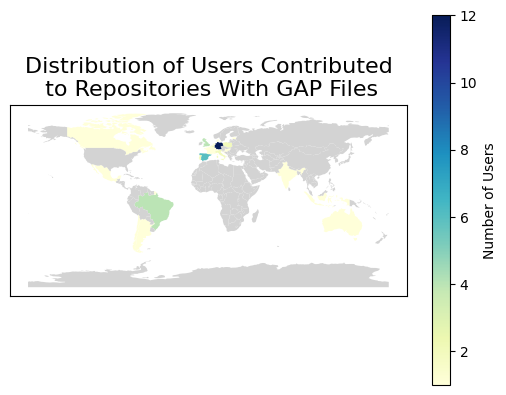

In [191]:
# Plot the choropleth map
plt.figure(figsize=(25, 15))  # Adjust the figure size if needed
merged_data.plot(column='User Count', cmap='YlGnBu', legend=True, vmin=min_positive_value, legend_kwds={'label': 'Number of Users'}, missing_kwds={'color': 'lightgrey'})
plt.title('Distribution of Users Contributed\n to Repositories With GAP Files', fontsize=16)

plt.xticks([])  # Hide x-ticks
plt.yticks([])  # Hide y-ticks

# Save the plot as a PNG image
output_path = '../output/contributor_distribution_map.png'  # Specify the path and file name for the output image
plt.savefig(output_path,  dpi=1800, bbox_inches='tight')  # Use dpi to control the image resolution

plt.show()

## Repository Commits, Issues, and Pull Requests per Year
##### NB: The data considers repositories with atleast one GAP file

In [192]:
# Step 1: Read data from CSV
repository_activity_file_path = "../data/repository_activity.csv"  # Replace with the actual file path
repository_activity_df = pd.read_csv(repository_activity_file_path)

# Group the DataFrame by month and calculate the sum of commits, issues, and pull requests per month
grouped_repository_activity_df = repository_activity_df.groupby('Year').sum()

# Extract the timeline (months) from the index and convert it to datetime
timeline = pd.to_datetime(grouped_repository_activity_df.index, format='%Y')


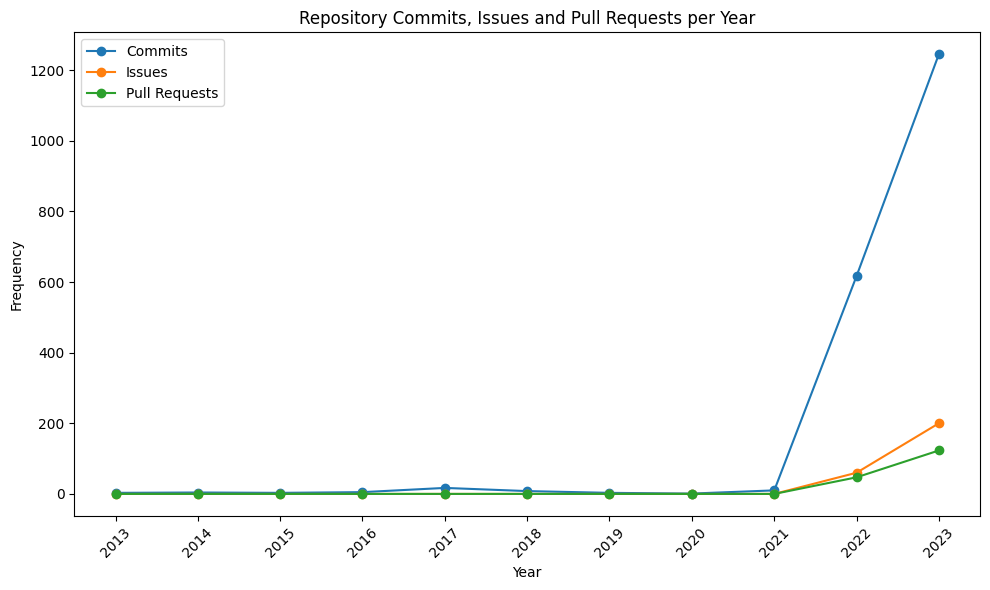

In [204]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(timeline, grouped_repository_activity_df['Commits Per Year'], label='Commits', marker='o')
plt.plot(timeline, grouped_repository_activity_df['Issues Per Year'], label='Issues', marker='o')
plt.plot(timeline, grouped_repository_activity_df['Pull Requests Per Year'], label='Pull Requests', marker='o')

# Customize the chart
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Repository Commits, Issues and Pull Requests per Year')
plt.legend()

date_format = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Set the x-axis ticks to be the same as the timeline (years) without modifications
plt.xticks(timeline)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()

# Save the plot as a PNG image
output_path = '../output/repository_activity.png'  
plt.savefig(output_path,  dpi=400, bbox_inches='tight')  

plt.show()

## Repositories vs Collaborators
##### NB: The data considers repositories with atleast one GAP file

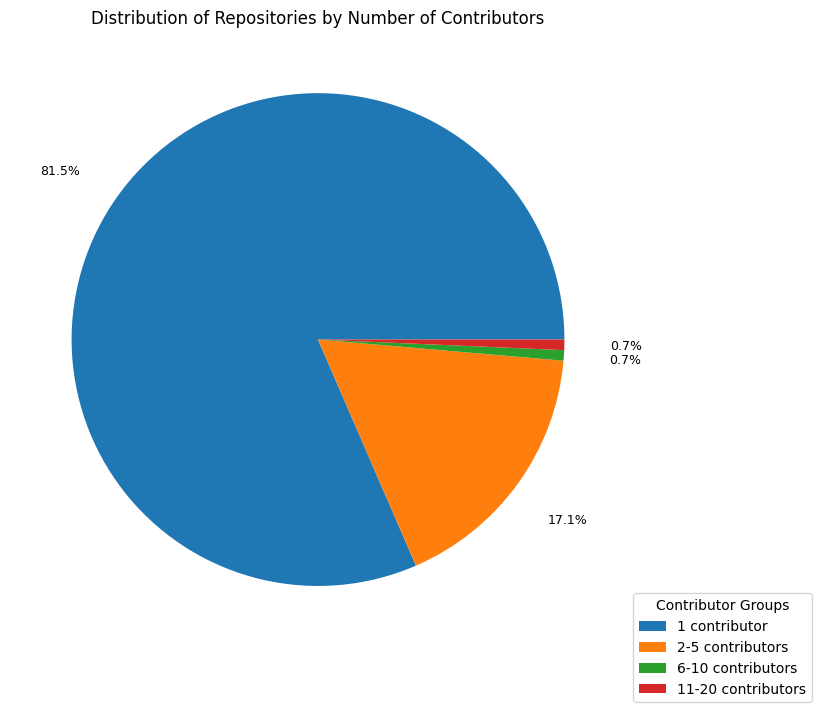

In [200]:
# The code to create pie chart is referred from https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

bins = [0, 1, 5, 10, 20, 50, float("inf")]
labels = ["1 contributor", "2-5 contributors", "6-10 contributors", "11-20 contributors", "21-50 contributors", "50+ contributors"]
repository_df["Contributor Group"] = pd.cut(repository_df["Number of Contributors"], bins=bins, labels=labels)
contributor_groups = repository_df["Contributor Group"].value_counts()

contributor_groups = contributor_groups[contributor_groups > 0]
labels = contributor_groups.index
plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(contributor_groups, autopct='%1.1f%%', pctdistance=1.25)

plt.legend(wedges, labels,
          title="Contributor Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 0))

plt.setp(autotexts, size=9)

plt.title("Distribution of Repositories by Number of Contributors")
# Save the plot as a PNG image
output_path = '../output/repository_vs_collaborators.png' 
plt.savefig(output_path,  dpi=400, bbox_inches='tight')

plt.show()